In [2]:
import pandas as pd


df_final = pd.read_csv("/Users/loicalix-brown/OneDrive/FYP/Coding/DF/df_final_grid.csv")

In [10]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from numpy import ravel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


In [11]:
for i in range (len(df_final)):
    if (df_final.churned[i] > 1):
        df_final.churned[i] = 1

In [12]:
y = df_final.churned.value_counts()
print(y)

0.0    2604
1.0    1735
Name: churned, dtype: int64


In [13]:
X = df_final.iloc[:,-30:-2].values
print(X)

Y = df_final.iloc[:,-2:-1].values
print(Y)

[[ 8.         8.         2.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         2.         0.       ]
 [20.         0.         9.        ...  0.         0.         0.       ]
 ...
 [ 2.         0.        34.        ...  0.         0.1767767  0.1767767]
 [ 0.         0.         0.        ...  0.         0.25       0.       ]
 [21.         0.         2.        ...  0.         0.25       0.       ]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, Y_res = ros.fit_resample(xTrain, yTrain)
xTrain = X_res
yTrain = Y_res

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [17]:
clf = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(15,8,2), random_state=1, max_iter = 5000)
clf.fit(xTrain, yTrain)

MLPClassifier(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
yPred = clf.predict(xTest)

In [19]:
yTrue, yPred = yTest , clf.predict(xTest)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       848
         1.0       0.77      0.62      0.69       599

    accuracy                           0.77      1447
   macro avg       0.77      0.74      0.75      1447
weighted avg       0.77      0.77      0.76      1447



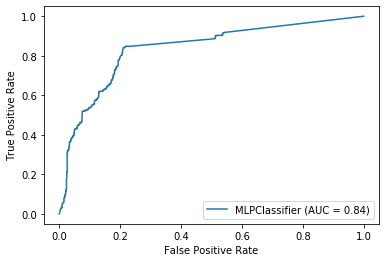

In [20]:
MLP_disp = plot_roc_curve(clf, xTest, yTest)
plt.show()

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
       'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15)
        }

param_comb = 50
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1001)
clf = MLPClassifier()
model = RandomizedSearchCV(clf, param_distributions=params, n_iter=param_comb, scoring='neg_brier_score', n_jobs=4, cv=3, verbose=3, random_state=1001 )
search = model.fit(xTrain, yTrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   57.7s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  1.3min finished


In [26]:
search.best_params_

{'solver': 'lbfgs', 'max_iter': 1700, 'hidden_layer_sizes': 11, 'alpha': 1e-06}

In [27]:
search.best_score_

-0.11440047709847341

In [42]:
clf = MLPClassifier(solver='lbfgs', alpha= 1e-06, hidden_layer_sizes = 11, random_state=1, max_iter = 3000)
clf.fit(xTrain, yTrain)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=11, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [43]:
yTrue, yPred = yTest , clf.predict(xTest)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       848
         1.0       0.75      0.76      0.75       599

    accuracy                           0.80      1447
   macro avg       0.79      0.79      0.79      1447
weighted avg       0.80      0.80      0.80      1447



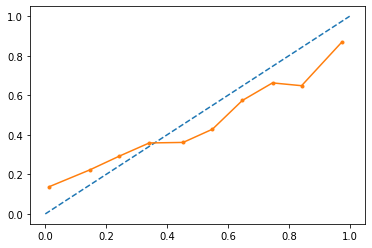

In [58]:
predictions = clf.predict_proba(xTest)[:,1]
# reliability diagram
fop, mpv = calibration_curve(yTest, predictions, n_bins=10, normalize=False)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [59]:
brier_score_loss(yTest, predictions)

0.16184192754097687

In [49]:
calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
calibrated.fit(xTrain, (yTrain))

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


CalibratedClassifierCV(base_estimator=MLPClassifier(activation='relu',
                                                    alpha=1e-06,
                                                    batch_size='auto',
                                                    beta_1=0.9, beta_2=0.999,
                                                    early_stopping=False,
                                                    epsilon=1e-08,
                                                    hidden_layer_sizes=11,
                                                    learning_rate='constant',
                                                    learning_rate_init=0.001,
                                                    max_fun=15000,
                                                    max_iter=3000, momentum=0.9,
                                                    n_iter_no_change=10,
                                                    nesterovs_momentum=True,
                                             

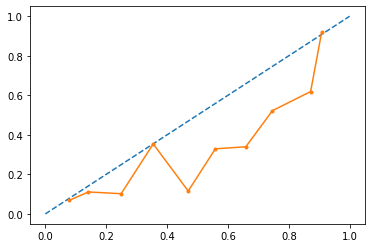

In [57]:
probs = calibrated.predict_proba(xTest)[:, 1]

# reliability diagram
fop, mpv = calibration_curve(yTest, probs, n_bins=10, normalize=False)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [51]:
brier_score_loss(yTest, probs)

0.18441464368271177

In [56]:
probs[0:20]

array([0.91077597, 0.1980981 , 0.07538736, 0.09938692, 0.57059874,
       0.07538736, 0.55445326, 0.47996975, 0.47996975, 0.79349564,
       0.91014675, 0.80668043, 0.76867716, 0.68570001, 0.47996975,
       0.47996975, 0.076625  , 0.58350909, 0.90811858, 0.9024886 ])